In [2]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Mammals


##Standard Linear Regression

In [3]:
mammals = pd.read_csv("mammals.csv")

#Convert df columns to arrays
body = mammals['body'].values
brain = mammals['brain'].values

#Add column of 1s to body for intercept
body = sm.add_constant(body)

#Initialise Model
regression = sm.OLS(brain, body)

#Fit model
results = regression.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Tue, 26 May 2015   Prob (F-statistic):           1.54e-28
Time:                        18:50:52   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.041         3.886   178.123
x1             0.9665      0.048     20.278      0.0

##Linear Regression w/Log Transformation

In [4]:
#Create new arrays using log of brain and body values
body_log = np.log(mammals['body'].values)
brain_log = np.log(mammals['brain'].values)
body_log = sm.add_constant(body_log)


#Initialise Model
regression_log = sm.OLS(brain_log, body_log)

#Fit model
results_log = regression_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Tue, 26 May 2015   Prob (F-statistic):           9.84e-35
Time:                        18:50:52   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.1348      0.096     22.227      0.000         1.943     2.327
x1             0.7517      0.028     26.409      0.0

####Using the log of body and brain significantly improves the R2 of the model.

#Blood Pressure Prediction

In [5]:
# read in data and give columns sensible names
blood_pressure = pd.read_csv("x03.csv", header=None, delimiter=r"\s+")
blood_pressure.columns = ['ind', 'const', 'age', 'sbp']
#blood_pressure

In [6]:
#Convert df columns to arrays
age = blood_pressure[['const', 'age']].values
sbp = blood_pressure['sbp'].values

#Initialise Model
bp_regression = sm.OLS(sbp, age)

#Fit model
bp_results = bp_regression.fit()

print(bp_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     21.33
Date:                Tue, 26 May 2015   Prob (F-statistic):           7.87e-05
Time:                        18:50:54   Log-Likelihood:                -127.08
No. Observations:                  30   AIC:                             258.2
Df Residuals:                      28   BIC:                             261.0
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         98.7147     10.000      9.871      0.000        78.230   119.200
x1             0.9709      0.210      4.618      0.0

####Model appears to have poor predictive power however a little investigation suggests that a large part of this is down to a single outlier:

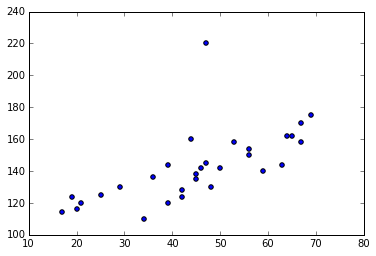

In [7]:
plt.scatter(blood_pressure['age'],blood_pressure['sbp'])
plt.show()

####Removing observations with a Systolic Blood Pressure over 200 helps

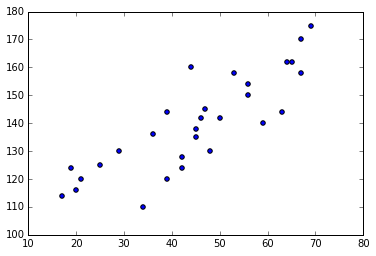

In [8]:
blood_pressure_adj = blood_pressure[blood_pressure['sbp'] < 200]
plt.scatter(blood_pressure_adj['age'],blood_pressure_adj['sbp'])
plt.show()

####The adjusted data suggests that age is a better predictor of blood pressure than it had previously appeared.

In [9]:
#Convert df columns to arrays
age_adj = blood_pressure_adj[['const', 'age']].values
sbp_adj = blood_pressure_adj['sbp'].values

#Initialise Model
bp_regression_adj = sm.OLS(sbp_adj, age_adj)

#Fit model
bp_results_adj = bp_regression_adj.fit()

print(bp_results_adj.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     66.81
Date:                Tue, 26 May 2015   Prob (F-statistic):           8.88e-09
Time:                        18:50:57   Log-Likelihood:                -105.59
No. Observations:                  29   AIC:                             215.2
Df Residuals:                      27   BIC:                             217.9
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         97.0771      5.528     17.562      0.000        85.735   108.419
x1             0.9493      0.116      8.174      0.0